In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.join(
    os.environ["RNB_PLANNING_DIR"], 'src')))
from biwheel_client import *

In [6]:
import matplotlib.pyplot as plt

In [100]:
from pkg.utils.rotation_utils import calc_rotvec_vecs

In [133]:
from pkg.utils.utils import sign_positive_bias

In [135]:
from pkg.utils.utils import GlobalTimer
gtimer = GlobalTimer.instance()

32
28
32
33
38
20
20
45
26
56
33
11
65
47
18
29
interpolate: 	15.4 ms/16 = 1.0 ms (0.46/1.271)



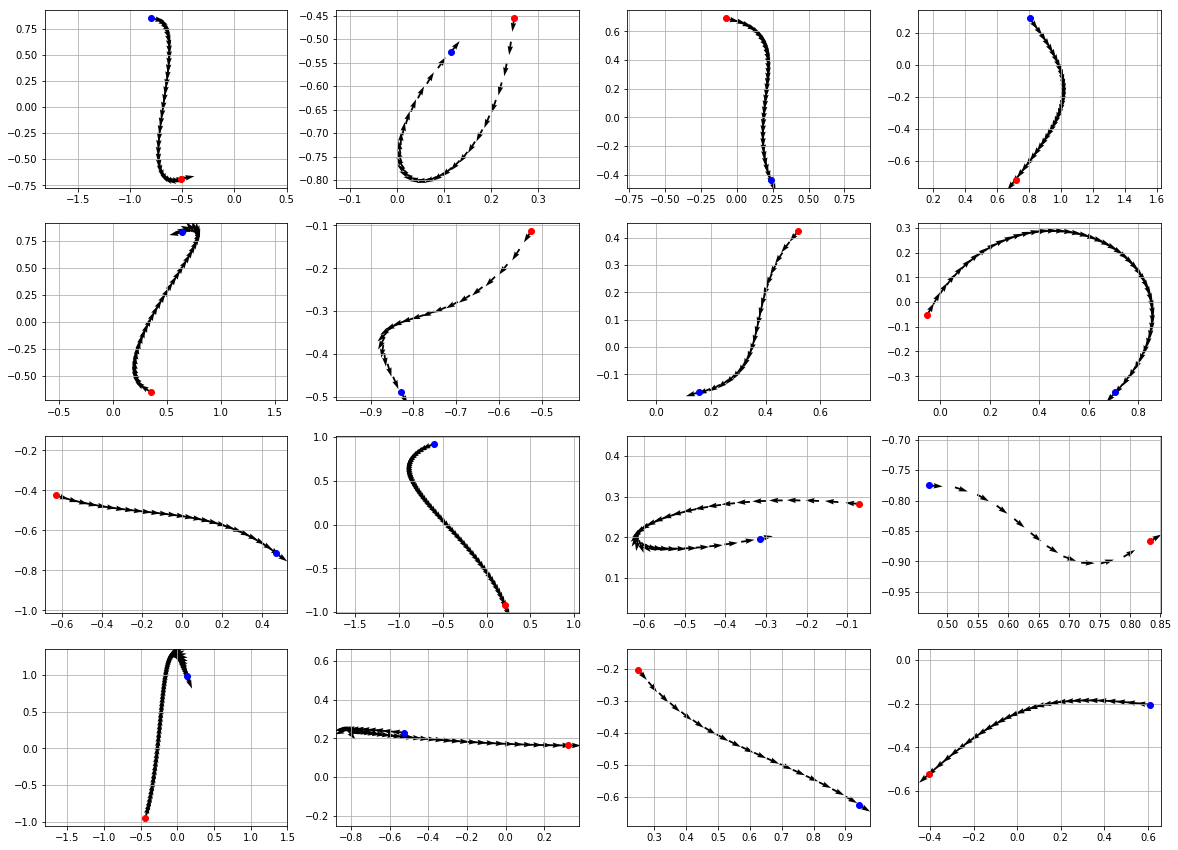

In [137]:
gtimer.reset()
COLS = 4
ROWS = 4
plt.figure(figsize=(20, int(15.0/COLS*ROWS)))
for i in range(1, ROWS+1):
    for j in range(1, COLS+1):
        plt.subplot(ROWS, COLS, (i-1)*COLS+j)
        X0 = (np.random.rand(3)-0.5)*[2,2,2*np.pi]
        Xn = (np.random.rand(3)-0.5)*[2,2,2*np.pi]
        
        ref_step = 0.05
        with gtimer.block("interpolate"):
            X_list = interpolate_nonholo_leastnorm(X0, Xn, ref_step=ref_step)

        plt.quiver(X_list[:,0], X_list[:,1], ref_step*np.cos(X_list[:,2]), ref_step*np.sin(X_list[:,2]))
        plt.plot(X0[0], X0[1],'ro')
        plt.plot(Xn[0], Xn[1],'bo')
        plt.axis("equal")
        plt.grid()
print(gtimer)